In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3  # Generate N points with 2 features in the range [-3, 3]
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])


# This function will implement

y=Cos(2x1)+ Cos(3x2)

In [10]:
model =nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)


In [11]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [13]:
def full_gd(model,criterion,optimizer,X,Y,epochs=1000):
    train_losses=np.zeros(epochs)
    for epoch in range(epochs):

        optimizer.zero_grad()

        output=model(X)
        loss=criterion(output,Y)

        loss.backward()
        optimizer.step()

        train_losses[epoch]=loss.item()
        if (epoch+1)%50==0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return train_losses



In [14]:
X_train=torch.from_numpy(X.astype(np.float32))
y_train=torch.from_numpy(Y.astype(np.float32).reshape(-1,1))

train_losses=full_gd(model,criterion,optimizer,X_train,y_train)

Epoch [50/1000], Loss: 0.5559
Epoch [100/1000], Loss: 0.2503
Epoch [150/1000], Loss: 0.1020
Epoch [200/1000], Loss: 0.0288
Epoch [250/1000], Loss: 0.0102
Epoch [300/1000], Loss: 0.0054
Epoch [350/1000], Loss: 0.0041
Epoch [400/1000], Loss: 0.0036
Epoch [450/1000], Loss: 0.0040
Epoch [500/1000], Loss: 0.0024
Epoch [550/1000], Loss: 0.0023
Epoch [600/1000], Loss: 0.0020
Epoch [650/1000], Loss: 0.0018
Epoch [700/1000], Loss: 0.0024
Epoch [750/1000], Loss: 0.0016
Epoch [800/1000], Loss: 0.0016
Epoch [850/1000], Loss: 0.0018
Epoch [900/1000], Loss: 0.0015
Epoch [950/1000], Loss: 0.0018
Epoch [1000/1000], Loss: 0.0014


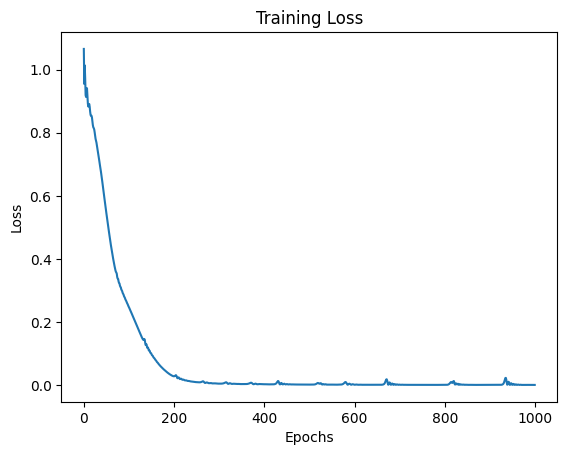

In [15]:
plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

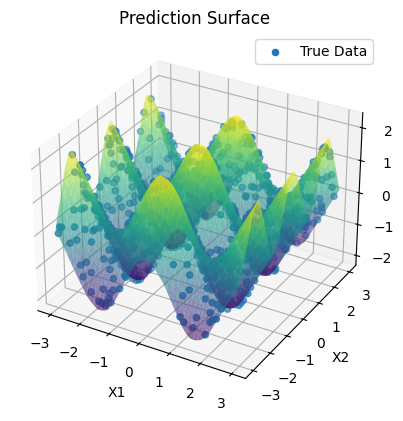

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import torch

# Plot the prediction surface
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot
ax.scatter(X[:, 0], X[:, 1], Y, label="True Data")  # Scatter plot of true data

# Generate the surface plot
with torch.no_grad():  # Disable gradient computation
    line = np.linspace(-3, 3, 50)  # Generate points in the range [-3, 3]
    xx, yy = np.meshgrid(line, line)  # Create a grid for plotting
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T  # Stack grid points
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))  # Convert to tensor
    Yhat = model(Xgrid_torch).numpy().flatten()  # Get model predictions

# Plot the prediction surface
ax.plot_trisurf(
    Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True, alpha=0.6, cmap="viridis"
)

# Labels and title
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("Prediction Surface")
plt.legend()
plt.show()
